In [33]:
import pandas as pd
import numpy as np
from Preprocessing import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [25]:
data = getDFcleanedFulled()
data

,Title,Company,Location,TypeContrat,Salary,Description,Date,Link,TypeContrat_CDI,TypeContrat_Temps plein,TypeContrat_Apprentissage,TypeContrat_Contrat pro,TypeContrat_CDD,TypeContrat_Intérim,TypeContrat_Temps partiel,TypeContrat_Stage,TypeContrat_Indépendant
0,Data Scientist,Malakoff Humanis,Paris,"Apprentissage, Contrat pro",notfound,Contrat\r\nALTERNANCE\r\nFinalité du poste\r\n...,2020-05-21 14:00:21.641431,/pagead/clk?mo=r&ad=-6NYlbfkN0BfLf6vlT6l4ABp3X...,0,0,1,1,0,0,0,0,0
1,Data Scientist,Jellysmack,Paris,"Temps plein, CDI",notfound,Nous continuons de recruter et avons adapté no...,2020-04-30 14:00:21.641431,/pagead/clk?mo=r&ad=-6NYlbfkN0B8n3TtewkfrSQLVL...,1,1,0,0,0,0,0,0,0
2,Direction,Castelis,Paris,notfound,50000,"Présentation de la société Castelis conçoit, d...",2020-04-25 14:00:21.642431,/pagead/clk?mo=r&ad=-6NYlbfkN0Bl_GJvjV7T_nyT7Y...,0,0,0,0,0,0,0,0,0
3,Data Scientist,BNP Paribas,Paris,"Temps plein, Stage",notfound,ASSISTANT DATA SCIENTIST - STAGE 3 MOIS H/F (N...,2020-05-25 14:00:21.642431,/rc/clk?jk=dc84057ced14dfad&fccid=1392500f835b...,0,1,0,0,0,0,0,1,0
4,Data Scientist,NEOBRAIN,Paris,"Temps plein, CDI",notfound,Neobrain développe des solutions digitales int...,2020-05-25 14:00:21.642431,/company/NEOBRAIN/jobs/Data-Scientist-dfce81a4...,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Dev Web,Exakis,Lyon,CDI,notfound,"Exakis Nelite, entité du groupe Magellan Partn...",2020-04-24 14:00:31.982085,/rc/clk?jk=2492975828792445&fccid=74b179ae010f...,1,0,0,0,0,0,0,0,0
1021,Dev Back end,Apside,Lyon,notfound,notfound,Et si vous étiez prêt pour un challenge qui so...,2020-04-24 14:00:31.982085,/rc/clk?jk=5a58da742f83dea9&fccid=c4b1242d6123...,0,0,0,0,0,0,0,0,0
1022,Data Analyst,Crédit mutuel,Lyon,CDI,notfound,Les équipes « Ergonomie et Services Distants »...,2020-04-24 14:00:31.982085,/rc/clk?jk=7583f6ab09cd15e3&fccid=064584719361...,1,0,0,0,0,0,0,0,0
1023,developpeur,AXOPEN,Lyon,"Temps plein, CDI",notfound,"Pour toi, Android est le meilleur OS de tous l...",2020-05-18 14:00:31.983094,/company/AXOPEN/jobs/D%C3%A9veloppeur-Android-...,1,1,0,0,0,0,0,0,0


In [51]:
data['Title'].value_counts()

Data Analyst              297
developpeur               283
Dev Web                   258
Data Scientist            217
Data Engineer             178
Ingénieur                 153
Machine Learning          117
autres                    116
Business Intelligence      95
Dev Back end               88
Consultant                 87
Direction                  71
Dev Front end              52
Data                       46
Big Data                   41
Manager                    31
Experience Utilisateur     21
Admin reseau               10
Marketing                   8
Cyber sécurity              8
Bio-Informatique            5
Scrum                       3
trésorier                   2
Name: Title, dtype: int64

- je recupere l'occurence de chaque mots dans les descriptions, et jen fais un DF 

In [261]:
vektor = CountVectorizer()
Descroccurence = vektor.fit_transform(data['Description'])
Descroccurence = pd.DataFrame(Descroccurence.toarray(),columns= vektor.get_feature_names())

- J'applique une cluserisation sur ces données afin de tirer du sens de ma features déscription et de la categoriser en 3 groupes 

In [206]:
res = KMeans(n_clusters=3, random_state=7).fit_predict(Descroccurence)

In [207]:
pd.Series(res).value_counts()

2    1316
1     642
0     229
dtype: int64

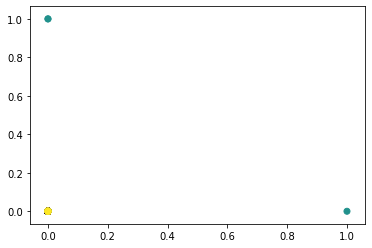

In [268]:
import matplotlib.pyplot as plt 
plt.scatter(Descroccurence['œuvrer'],Descroccurence["œuvrons"],c=res)

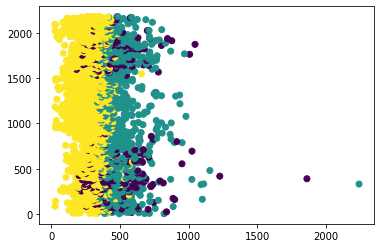

In [273]:
plt.scatter(Descroccurence.sum(axis=1),range(0,2187),c=res)

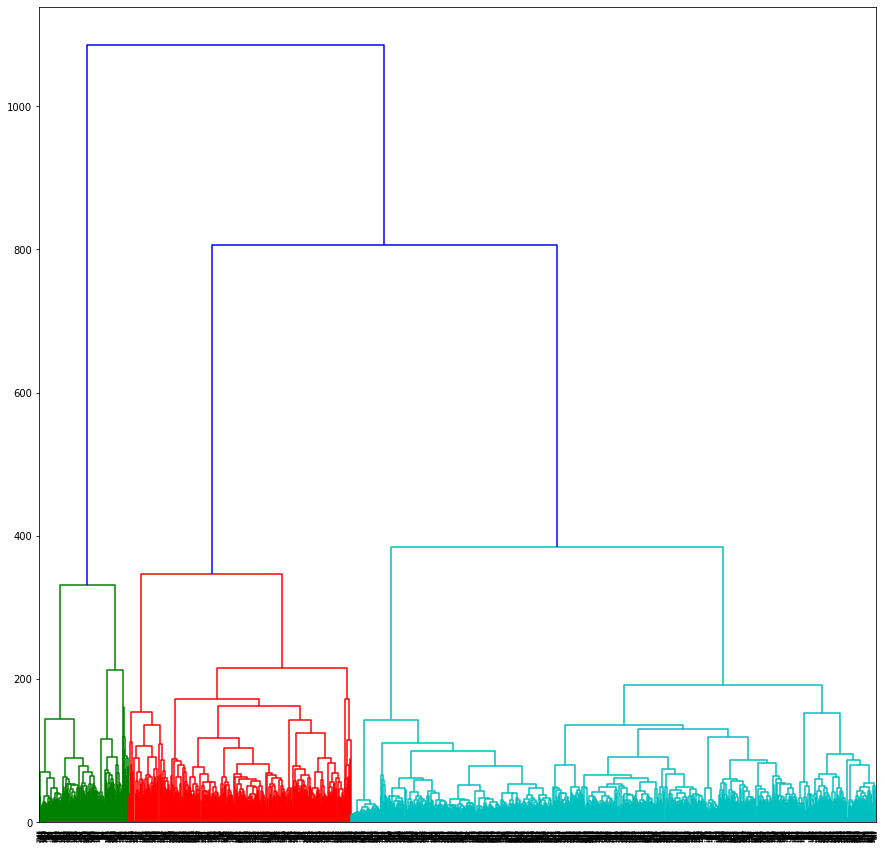

In [276]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
mat_lien = linkage(Descroccurence, method='ward', metric='euclidean')
fig = plt.figure(figsize=(15,15))
dendrogram(mat_lien, orientation='top', color_threshold=400)
plt.show()

In [284]:
cah = fcluster(mat_lien, t = 400, criterion = 'distance')  
cah = cah-1
cah = pd.Series(cah)

In [288]:
from sklearn.metrics import confusion_matrix
cof = confusion_matrix(cah ,res )
cof

array([[ 226,    0,    8],
       [   1,  545,   35],
       [   2,   97, 1273]], dtype=int64)

- En Observant ces Techniques de catégorisation, on cherche a démontrer que nous pouvons rendre de ce text une information qui divise les texts en 3 catégories.

In [293]:
import numpy as np
def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [302]:
levenshtein("donné","donner")

[[0. 1. 2. 3. 4. 5. 6.]
 [1. 0. 1. 2. 3. 4. 5.]
 [2. 1. 0. 1. 2. 3. 4.]
 [3. 2. 1. 0. 1. 2. 3.]
 [4. 3. 2. 1. 0. 1. 2.]
 [5. 4. 3. 2. 1. 1. 2.]]


2.0

-ITERER SUR LES NOMS DE COLLONE AVEC UN LEVENSTEIN > 3 POUR LES RECUPERER TOUTES EN 1 WALLILA